In [7]:
import flask 
import time
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import re
from PIL import Image 
import os
import sqlite3
import subprocess
import io
import json
from collections import deque
import numpy as np 
from PIL import Image as im 
from pytesseract import pytesseract 

In [2]:
conn = sqlite3.connect("database.db")

query_str = f'''SELECT *
FROM big_table 
'''
df = pd.read_sql(query_str, conn)
df = df.set_index('text')

conn.close()


In [3]:
df

,left,top,conf,floor,building
text,,,,,
110,575,1128,96.601105,1,ag_hall
108,1852,1144,96.204437,1,ag_hall
105,2153,1146,96.073708,1,ag_hall
115,465,1628,95.860275,1,ag_hall
116,703,1624,96.918640,1,ag_hall
117,922,1625,96.501122,1,ag_hall
100,1940,1650,95.817406,1,ag_hall
102,2231,1646,95.777069,1,ag_hall
103,2458,1644,96.039322,1,ag_hall


In [4]:
a = np.array([[1,2], [3,4]])

In [5]:
a//2

array([[0, 1],
       [1, 2]], dtype=int32)

In [2]:
img = plt.imread(os.path.join('floorplans','ag_hall','ag_hall_1.jpg'))

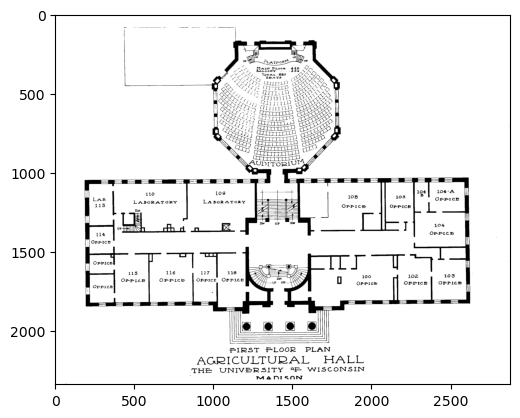

In [3]:
plt.imshow(img, cmap="gray")

In [8]:
img.shape

(2338, 2879)

In [45]:
img2 = np.zeros((3,img.shape[1],img.shape[0]), dtype=int)

In [46]:
img2[0] = img.transpose()

In [47]:
b = np.array([[[1,2,3],
              [4,5,6]]])

In [48]:
b.shape

(1, 2, 3)

In [49]:
b.transpose().shape

(3, 2, 1)

In [50]:
img2.transpose().shape

(2338, 2879, 3)

In [51]:
img3 = img2.transpose()

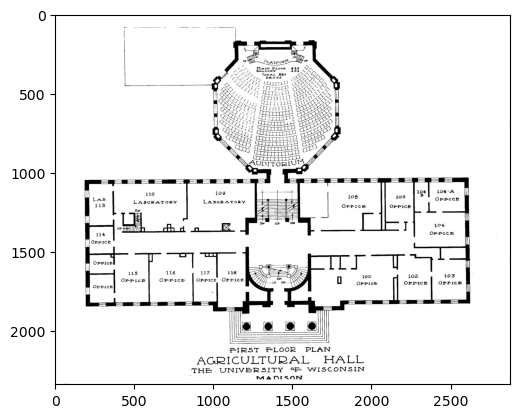

In [5]:
img2 = np.zeros((3,img.shape[1],img.shape[0]), dtype=int)
img2[0] = img.transpose()
img2[1] = img.transpose()
img2[2] = img.transpose()
img3 = img2.transpose()

plt.imshow(img3)

In [44]:
type(sorted(pd.Series(img.reshape(-1)).value_counts().index)[0])

int

In [57]:
img.shape

(2338, 2879)

In [58]:
img.transpose()
img.shape

(2338, 2879)

In [59]:
img.transpose()

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [60]:
img2

array([[[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]],

       [[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]],

       [[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]]])

In [62]:
img3.shape

(2338, 2879, 3)

In [9]:
def find_num(string):
    if len(re.findall(r'\d', string)) > 0:
        return True
#     if string.lower() == 'up' or string.lower() == 'down':
#         return True
    return False
#     return True

In [36]:
dirs = 'ag_hall'
file = 'ag_hall_1.jpg'

image_path = os.path.join("C:\\", "My Data", "Academics", "Projects", "building-navigator", "floorplans", dirs, file)
print(image_path)
if not image_path.endswith('clear.jpg'):
    path_to_tesseract = r"C:\Program Files\Tesseract-OCR\tesseract.exe"
#     img = Image.open(image_path, 'r')
    img = plt.imread(os.path.join('floorplans','ag_hall','ag_hall_1.jpg'))
    print(img.shape)
    pytesseract.tesseract_cmd = path_to_tesseract 
#     data = pytesseract.image_to_data(image_path)
#     img.close()
    data = pytesseract.image_to_data(img)
    weird_string = re.findall("([\s\S]*)\n$", data)
    l = [line.split('\t') for line in weird_string[0].split('\n')]
    df = pd.DataFrame(l[1:], columns = l[0])
    print(df)
    filtered_df = df[(df['text'] != '') & (df['conf'].astype(float) > 90)]
#             filtered_df = df[(df['text'] != '')]
#             print(filtered_df)
    final_df = filtered_df[filtered_df['text'].apply(find_num)][['left', 'top', 'text','conf', 'width', 'height']]
    final_df = final_df.set_index("text")
#             print(final_df)
    findings = re.findall(f"{dirs}_(.)\.jpg",file) 
    if len(findings) > 0:
        final_df['floor'] = re.findall(f"{dirs}_(.)\.jpg",file)[0]
        final_df['building'] = dirs
        

C:\My Data\Academics\Projects\building-navigator\floorplans\ag_hall\ag_hall_1.jpg
(2338, 2879)
    level page_num block_num par_num line_num word_num  left   top width  \
0       1        1         0       0        0        0     0     0  2879   
1       2        1         1       0        0        0   528    75   602   
2       3        1         1       1        0        0   528    75   602   
3       4        1         1       1        1        0   528    75   602   
4       5        1         1       1        1        1   528    75   602   
..    ...      ...       ...     ...      ...      ...   ...   ...   ...   
309     5        1        52       1        2        2  1039  2235   402   
310     5        1        52       1        2        3  1488  2233    68   
311     5        1        52       1        2        4  1593  2230   360   
312     4        1        52       1        3        0  1270  2285   292   
313     5        1        52       1        3        1  1270  2285   

In [37]:
final_df

,left,top,conf,width,height,floor,building
text,,,,,,,
110,575,1128,96.601105,52,20,1,ag_hall
108,1852,1144,96.204437,59,23,1,ag_hall
105,2153,1146,96.073708,58,20,1,ag_hall
115,465,1628,95.860275,55,21,1,ag_hall
116,703,1624,96.918640,55,22,1,ag_hall
117,922,1625,96.501122,53,21,1,ag_hall
100,1940,1650,95.817406,55,20,1,ag_hall
102,2231,1646,95.777069,62,22,1,ag_hall
103,2458,1644,96.039322,65,21,1,ag_hall


array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

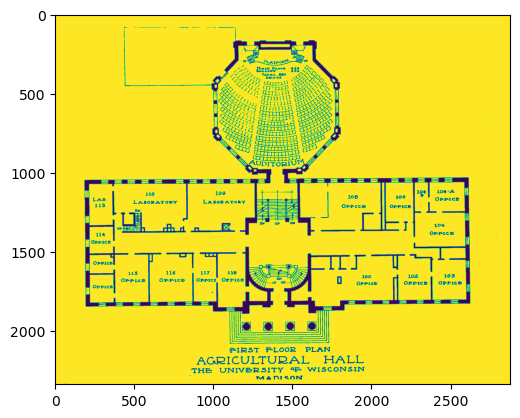

In [41]:
img = plt.imread(os.path.join('floorplans','ag_hall','ag_hall_1.jpg'))
plt.imshow(img)
img

1128 575
1144 1852
1146 2153
1628 465
1624 703
1625 922
1650 1940
1646 2231
1644 2458


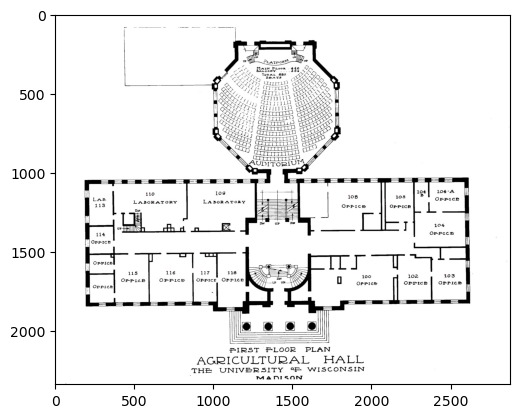

In [43]:
img = plt.imread(os.path.join('floorplans','ag_hall','ag_hall_1.jpg'))

img2 = np.zeros((3,img.shape[1],img.shape[0]), dtype=int)
img2[0] = img.transpose()
img2[1] = img.transpose()
img2[2] = img.transpose()
img3 = img2.transpose()


for tup in final_df.itertuples():
    y = int(tup.left)
    x = int(tup.top)
    print(x,y)
    img3[x][y] = [255,0,0]
    img3[x+1][y] = [255,0,0]
    img3[x][y+1] = [255,0,0]
    img3[x+1][y+1] = [255,0,0]
    img3[x+2][y] = [255,0,0]
    img3[x][y+2] = [255,0,0]
    img3[x+2][y+2] = [255,0,0]
    img3[x+3][y] = [255,0,0]
    img3[x][y+3] = [255,0,0]
    img3[x+3][y+3] = [255,0,0]
    img3[x+4][y] = [255,0,0]
    img3[x][y+4] = [255,0,0]
    img3[x+4][y+4] = [255,0,0]





plt.imshow(img3)

In [38]:
pytesseract.get_tesseract_version() 

<Version('5.3.3.20231005')>